In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PiCq9IGGS4uodSQ3QaKP")
project = rf.workspace("ocr-sa0bg").project("ssocr2")
dataset = project.version(5).download("multiclass")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SSOCR2-5 in multiclass:: 100%|██████████| 930/930 [00:00<00:00, 4581.25it/s]


Betölltés:

In [ ]:
import pandas as pd

# Beolvasás
train_data = pd.read_csv('/content/SSOCR2-5/train/_classes.csv')
valid_data = pd.read_csv('/content/SSOCR2-5/valid/_classes.csv')
test_data = pd.read_csv('/content/SSOCR2-5/test/_classes.csv')

# Tisztítás (ez egy példa, a tényleges tisztítási lépések az adatoktól függenek)
# ... [tisztítási lépések]

# Címkék és képek elválasztása
train_images = train_data['filename'].values
train_labels = train_data.drop(columns=['filename']).values

valid_images = valid_data['filename'].values
valid_labels = valid_data.drop(columns=['filename']).values

test_images = test_data['filename'].values
test_labels = test_data.drop(columns=['filename']).values

# Az első néhány sor kinyomtatása
print(train_data.head())
print(valid_data.head())
print(test_data.head())

                                            filename   0   1   2   3   4   5  \
0  imaDSAgeRR_2_png.rf.e4e24a6c2b2732e0b69e2ca48a...   0   0   1   0   0   0   
1  image_8_png.rf.e521d6ab8c19e1daaf8455a564021ee...   0   0   0   1   0   0   
2  unseen_digit_2_1_png.rf.e5b4a8dbda3d9c253ff7be...   0   0   1   0   0   0   
3  unseen_digit_3_index_1_png.rf.e5ccfbd80d716cf8...   0   0   0   1   0   0   
4  unseen_digit_1_index_1_png.rf.e5efca974c2ecc6b...   0   1   0   0   0   0   

    6   7   8   9  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  
                                            filename   0   1   2   3   4   5  \
0  unseen_digit_0_index_2_png.rf.03069b4077aa9d19...   1   0   0   0   0   0   
1  unseen_digit_8_index_2_png.rf.03a6bce14d19db02...   0   0   0   0   0   0   
2  unseen_digit_4_index_2_png.rf.0547a836a7597ab7...   0   0   0   0   1   0   
3  unseen_digit_8_2_png.rf.095e7717b1de9ef7328719...   0   0   0   0   0   0   

Méretezés:

In [ ]:
from PIL import Image, ImageFilter
import os


def resize_images(image_filenames, source_dir, target_dir, size=(64, 64)):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in image_filenames:
        image_path = os.path.join(source_dir, filename)
        if os.path.exists(image_path):
            with Image.open(image_path) as img:
                img_resized = img.resize(size, Image.LANCZOS)
                img_resized.save(os.path.join(target_dir, filename))

# Képek átméretezése
source_directory_train = '/content/SSOCR2-5/train/'
source_directory_valid = '/content/SSOCR2-5/valid/'
source_directory_test = '/content/SSOCR2-5/test/'

target_directory_train = '/content/SSOCR2-5/train_resized/'
target_directory_valid = '/content/SSOCR2-5/valid_resized/'
target_directory_test = '/content/SSOCR2-5/test_resized/'

resize_images(train_images, source_directory_train, target_directory_train)
resize_images(valid_images, source_directory_valid, target_directory_valid)
resize_images(test_images, source_directory_test, target_directory_test)


Minden érték normalizálása


In [ ]:
def normalize_images_from_directory(directory_path):
    for filename in os.listdir(directory_path):
        filepath = os.path.join(directory_path, filename)
        with Image.open(filepath) as img:
            np_img = np.array(img) / 255.0  # normalizálás 0 és 1 közé
            normalized_img = Image.fromarray((np_img * 255).astype(np.uint8))
            normalized_img.save(filepath)

normalize_images_from_directory(target_directory_train)
normalize_images_from_directory(target_directory_valid)
normalize_images_from_directory(target_directory_test)


Modell építése:


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Modell építése
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 osztály van az adatok alapján

# Modell összefoglalása
model.summary()

# Modell fordítása
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

Modell tanítása:

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

def load_and_preprocess_images(image_filenames, directory):
    images = []
    for filename in image_filenames:
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

X_train = load_and_preprocess_images(train_images, target_directory_train)
X_valid = load_and_preprocess_images(valid_images, target_directory_valid)
X_test = load_and_preprocess_images(test_images, target_directory_test)

# Címkék one-hot kódolása
y_train = train_labels
y_valid = valid_labels
y_test = test_labels  # Csak ha van teszt halmazod


# Modell tanítása
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/4
26/26 [==============================] - 7s 257ms/step - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.1186 - val_accuracy: 0.9595
Epoch 2/4
26/26 [==============================] - 5s 191ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.1164 - val_accuracy: 0.9595
Epoch 3/4
26/26 [==============================] - 6s 223ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.1082 - val_accuracy: 0.9459
Epoch 4/4
26/26 [==============================] - 4s 167ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.1189 - val_accuracy: 0.9595


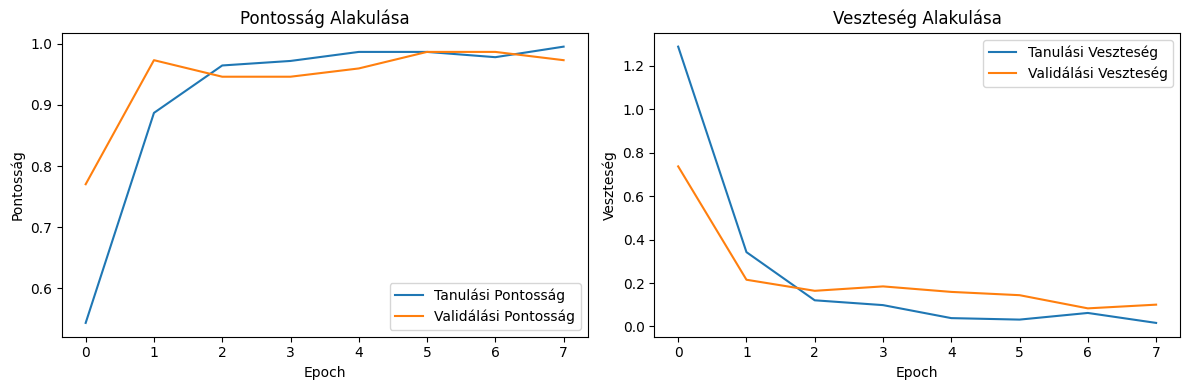

In [ ]:
# Pontosság diagram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tanulási Pontosság')
plt.plot(history.history['val_accuracy'], label='Validálási Pontosság')
plt.legend()
plt.title('Pontosság Alakulása')
plt.xlabel('Epoch')
plt.ylabel('Pontosság')

# Veszteség diagram
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Tanulási Veszteség')
plt.plot(history.history['val_loss'], label='Validálási Veszteség')
plt.legend()
plt.title('Veszteség Alakulása')
plt.xlabel('Epoch')
plt.ylabel('Veszteség')

plt.tight_layout()
plt.show()

MODELL MENTÉSE


In [ ]:
model.save('my_model_6.h5')


In [ ]:
import numpy as np

train_images = np.array(train_images)

flattened_train_labels = [label for sublist in train_labels for label in sublist]
flattened_valid_labels = [label for sublist in valid_labels for label in sublist]

y_train = to_categorical(flattened_train_labels, num_classes=10)
y_val = to_categorical(flattened_valid_labels, num_classes=10)

print(train_images.shape)
print(y_train.shape)
print(y_val.shape)

print(y_train)
print(y_val)

print(len(train_images))
print(len(train_labels))


(813,)
(8130, 10)
(740, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
813
813


In [ ]:
unique_classes_train = np.unique(train_labels)
unique_classes_valid = np.unique(valid_labels)

print("Egyedi osztályok a tanító adathalmazon:", unique_classes_train)
print("Egyedi osztályok a validációs adathalmazon:", unique_classes_valid)


Egyedi osztályok a tanító adathalmazon: [0 1]
Egyedi osztályok a validációs adathalmazon: [0 1]


In [ ]:
print(len(train_images), len(train_labels))
print(len(valid_images), len(valid_labels))

# Első 5 elem kiírása a tanító adathalmazból
print(train_labels[:5])



813 813
74 74
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/SSOCR2-2/train/_classes.csv')
print(df.head())  # Ezzel megjeleníted az első néhány sort


FileNotFoundError: ignored

In [ ]:
import pandas as pd

# Feltételezve, hogy az adatokat a df változóban tárolod:
df['class'] = df.iloc[:, 1:].idxmax(axis=1)

# Ezután megjelenítheted a képek nevét és az osztályukat:
print(df[['filename', 'class']])
